In [1106]:
import matplotlib, matplotlib.pyplot as plt
import scipy, scipy.special as sp
import seaborn as sns
import numpy as np
import numpy.linalg as npl
import math
import os
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
from scipy.linalg import solve,pinv,null_space,inv
import torch
from scipy.integrate import odeint,solve_bvp

In [1107]:
lim=5
P=int(1e3)
r=np.array([x for x in np.linspace(0,lim,P) if x!=0])
m=0.510 #in Mev
c=1
hbar=1
Z=1
e0=-1.602e-19
alpha=1/(137.035999084)

In [1108]:
k=-1

In [1109]:
def odes(r,x,p):
    E=p[0]
    #coef
    a1=-(k+1)/r
    a2=E+(Z*alpha/r)+m
    b1=(k-1)/r
    b2=E+(Z*alpha/r)-m

    return np.vstack((-a1*x[0]+a2*x[1],b1*x[1]-b2*x[0]))

In [1110]:
def bc(ya, yb,p):
    E=p[0]
    return np.array([ya[0], yb[0],ya[1]])

In [1111]:
y= np.zeros((2, r.shape[0]))
y[0,2]=np.exp(-r[2])
y[1,2]=np.exp(r[2])

In [1112]:
result = solve_bvp(odes,bc,r,y,p=[1.36e-5],verbose=2)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.54e-07       7.70e-34          999             0       
Solved in 1 iterations, number of nodes 999. 
Maximum relative residual: 1.54e-07 
Maximum boundary residual: 7.70e-34


In [1113]:
E=result.p[0]

In [1114]:
print(E)

1.3602400807307767e-05


In [1115]:
x_measles_plot = np.linspace(0.3,lim,P-1)
y_measles_plot = result.sol(x_measles_plot)

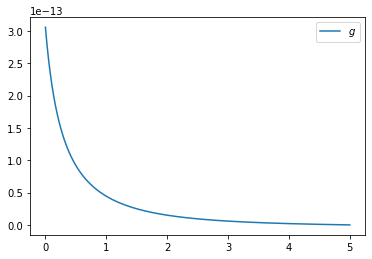

In [1116]:
plt.plot(r, y_measles_plot[0] , label='$g$')
plt.legend()
plt.show()

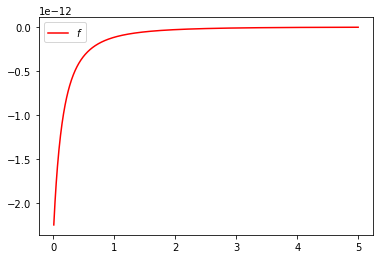

In [1117]:
plt.plot(r, y_measles_plot[1], label='$f$',color='r')
plt.legend()
plt.show()